<a href="https://colab.research.google.com/github/abdulrhman369/labs/blob/main/Parctice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Drop rows with missing target values
titanic_data = titanic_data.dropna(subset=['Survived'])

# Select relevant features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

# Convert categorical variable 'Sex' to numerical using .loc
X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

# Handle missing values in the 'Age' column using .loc
X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n{classification_rep}")


Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california_housing = fetch_california_housing()
california_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_data['MEDV'] = california_housing.target

# Select relevant features and target variable
X = california_data.drop('MEDV', axis=1)
y = california_data['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Mean Squared Error: 0.26
R-squared Score: 0.81


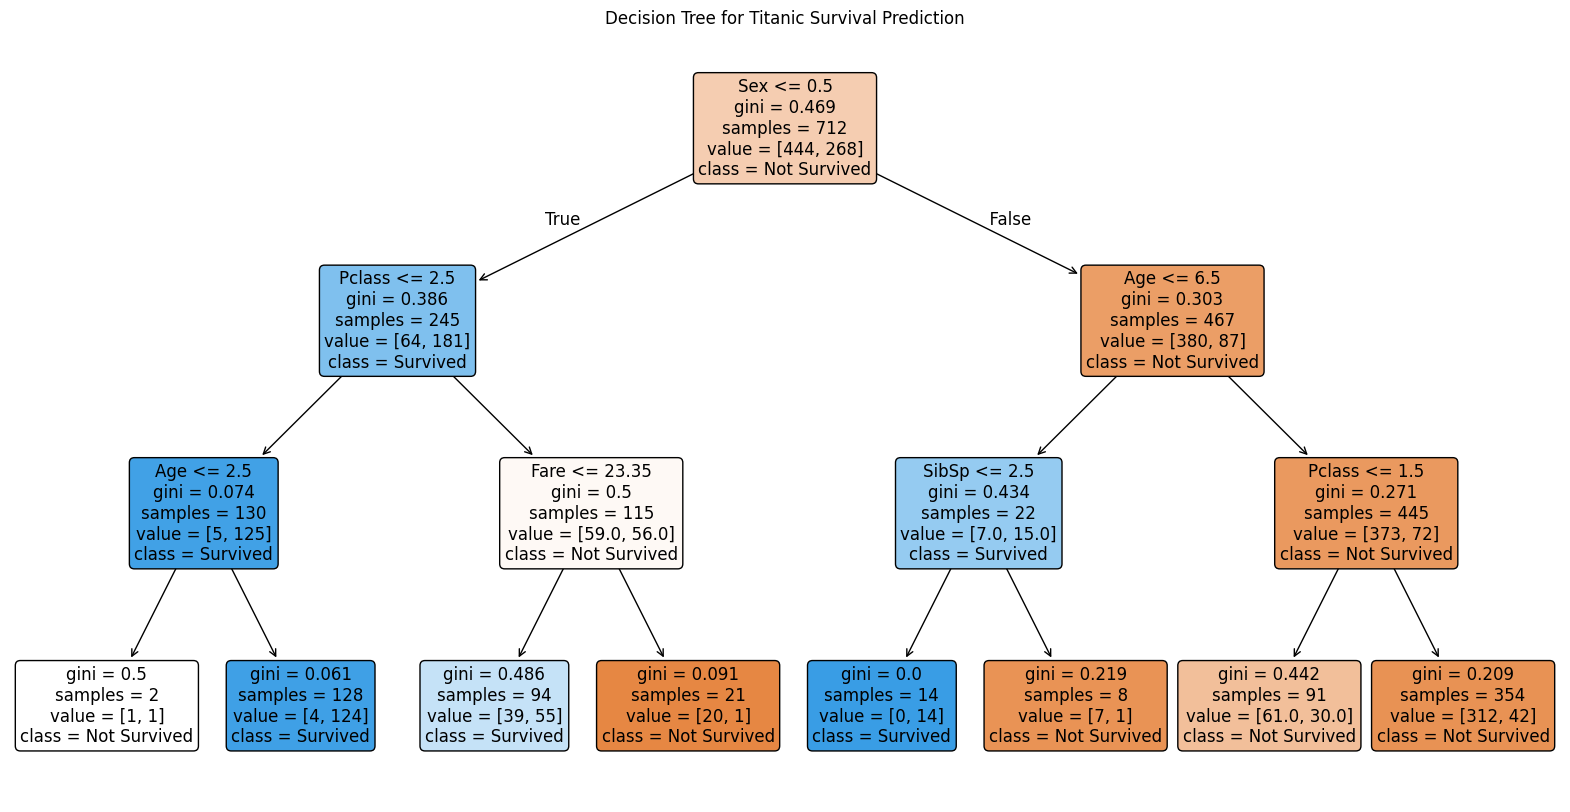

In [9]:
# Import necessary libraries for the decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting depth for better visualization

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=12)

plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()
